# Text Classification:

## Data
<pre>
1. we have total of 20 types of documents(Text files) and total 18828 documents(text files).
2. You can download data from this <a href='https://drive.google.com/open?id=1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM'>link</a>, in that you will get documents.rar folder. <br>If you unzip that, you will get total of 18828 documnets. document name is defined as'ClassLabel_DocumentNumberInThatLabel'. 
so from document name, you can extract the label for that document.
4. Now our problem is to classify all the documents into any one of the class.
5. Below we provided count plot of all the labels in our data. 
</pre>

<IPython.core.display.Javascript object>


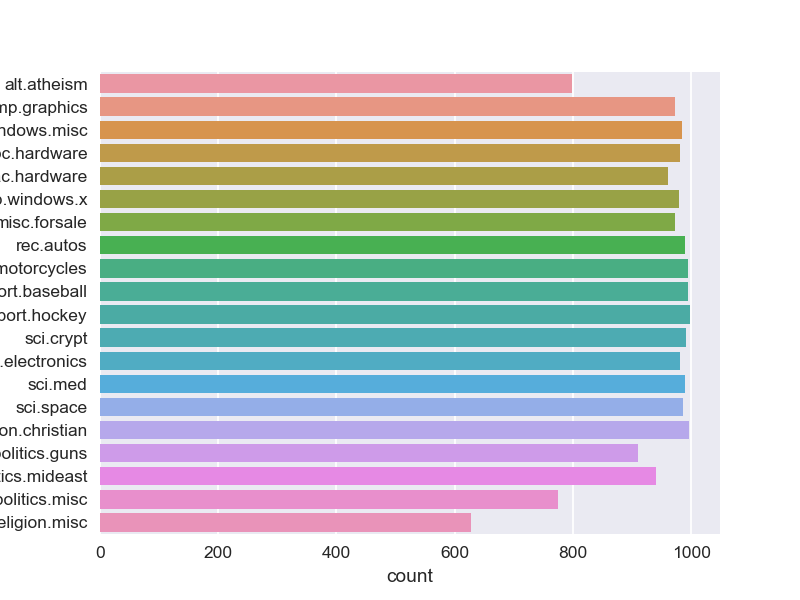

In [0]:
### count plot of all the class labels. 

## Assignment:

#### sample document
<pre>
<font color='blue'>
Subject: A word of advice
From: jcopelan@nyx.cs.du.edu (The One and Only)

In article < 65882@mimsy.umd.edu > mangoe@cs.umd.edu (Charley Wingate) writes:
>
>I've said 100 times that there is no "alternative" that should think you
>might have caught on by now.  And there is no "alternative", but the point
>is, "rationality" isn't an alternative either.  The problems of metaphysical
>and religious knowledge are unsolvable-- or I should say, humans cannot
>solve them.

How does that saying go: Those who say it can't be done shouldn't interrupt
those who are doing it.

Jim
--
Have you washed your brain today?
</font>
</pre>

### Preprocessing:
<pre>
useful links: <a href='http://www.pyregex.com/'>http://www.pyregex.com/</a>

<font color='blue'><b>1.</b></font> Find all emails in the document and then get the text after the "@". and then split those texts by '.' 
after that remove the words whose length is less than or equal to 2 and also remove'com' word and then combine those words by space. 
In one doc, if we have 2 or more mails, get all.
<b>Eg:[test@dm1.d.com, test2@dm2.dm3.com]-->[dm1.d.com, dm3.dm4.com]-->[dm1,d,com,dm2,dm3,com]-->[dm1,dm2,dm3]-->"dm1 dm2 dm3" </b> 
append all those into one list/array. ( This will give length of 18828 sentences i.e one list for each of the document). 
Some sample output was shown below. 

> In the above sample document there are emails [jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu]

preprocessing:
[jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu] ==> [nyx cs du edu mimsy umd edu cs umd edu] ==> 
[nyx edu mimsy umd edu umd edu]

<font color='blue'><b>2.</b></font> Replace all the emails by space in the original text. 
</pre>

In [0]:
# we have collected all emails and preprocessed them, this is sample output
preprocessed_email

array(['juliet caltech edu',
       'coding bchs edu newsgate sps mot austlcm sps mot austlcm sps mot com  dna bchs edu',
       'batman bmd trw', ..., 'rbdc wsnc org dscomsa desy zeus  desy',
       'rbdc wsnc org morrow stanford edu pangea Stanford EDU',
       'rbdc wsnc org apollo apollo'], dtype=object)

In [0]:
len(preprocessed_email)

18828

<pre>
<font color='blue'><b>3.</b></font> Get subject of the text i.e. get the total lines where "Subject:" occur and remove 
the word which are before the ":" remove the newlines, tabs, punctuations, any special chars.
<b>Eg: if we have sentance like "Subject: Re: Gospel Dating @ \r\r\n" --> You have to get "Gospel Dating"</b> 
Save all this data into another list/array. 

<font color='blue'><b>4.</b></font> After you store it in the list, Replace those sentances in original text by space.

<font color='blue'><b>5.</b></font> Delete all the sentances where sentence starts with <b>"Write to:"</b> or <b>"From:"</b>.
> In the above sample document check the 2nd line, we should remove that

<font color='blue'><b>6.</b></font> Delete all the tags like "< anyword >"
> In the above sample document check the 4nd line, we should remove that "< 65882@mimsy.umd.edu >"


<font color='blue'><b>7.</b></font> Delete all the data which are present in the brackets. 
In many text data, we observed that, they maintained the explanation of sentence 
or translation of sentence to another language in brackets so remove all those.
<b>Eg: "AAIC-The course that gets you HIRED(AAIC - Der Kurs, der Sie anstellt)" --> "AAIC-The course that gets you HIRED"</b>

> In the above sample document check the 4nd line, we should remove that "(Charley Wingate)"


<font color='blue'><b>8.</b></font> Remove all the newlines('\n'), tabs('\t'), "-", "\".

<font color='blue'><b>9.</b></font> Remove all the words which ends with <b>":"</b>.
<b>Eg: "Anyword:"</b>
> In the above sample document check the 4nd line, we should remove that "writes:"


<font color='blue'><b>10.</b></font> Decontractions, replace words like below to full words. 
please check the donors choose preprocessing for this 
<b>Eg: can't -> can not, 's -> is, i've -> i have, i'm -> i am, you're -> you are, i'll --> i will </b>

<b> There is no order to do point 6 to 10. but you have to get final output correctly</b>

<font color='blue'><b>11.</b></font> Do chunking on the text you have after above preprocessing. 
Text chunking, also referred to as shallow parsing, is a task that 
follows Part-Of-Speech Tagging and that adds more structure to the sentence.
So it combines the some phrases, named entities into single word.
So after that combine all those phrases/named entities by separating <b>"_"</b>. 
And remove the phrases/named entities if that is a "Person". 
You can use <b>nltk.ne_chunk</b> to get these. 
Below we have given one example. please go through it. 

useful links: 
<a href='https://www.nltk.org/book/ch07.html'>https://www.nltk.org/book/ch07.html</a>
<a href='https://stackoverflow.com/a/31837224/4084039'>https://stackoverflow.com/a/31837224/4084039</a>
<a href='http://www.nltk.org/howto/tree.html'>http://www.nltk.org/howto/tree.html</a>
<a href='https://stackoverflow.com/a/44294377/4084039'>https://stackoverflow.com/a/44294377/4084039</a>
</pre>

In [0]:
#i am living in the New York
print("i am living in the New York -->", list(chunks))
print(" ")
print("-"*50)
print(" ")
#My name is Srikanth Varma
print("My name is Srikanth Varma -->", list(chunks1))

i am living in the New York --> [('i', 'NN'), ('am', 'VBP'), ('living', 'VBG'), ('in', 'IN'), ('the', 'DT'), Tree('GPE', [('New', 'NNP'), ('York', 'NNP')])]
 
--------------------------------------------------
 
My name is Srikanth Varma --> [('My', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), Tree('PERSON', [('Srikanth', 'NNP'), ('Varma', 'NNP')])]


<pre>We did chunking for above two lines and then We got one list where each word is mapped to a 
POS(parts of speech) and also if you see "New York" and "Srikanth Varma", 
they got combined and represented as a tree and "New York" was referred as "GPE" and "Srikanth Varma" was referred as "PERSON". 
so now you have to Combine the "New York" with <b>"_"</b> i.e "New_York"
and remove the "Srikanth Varma" from the above sentence because it is a person.</pre>

<pre>
<font color='blue'><b>13.</b></font> Replace all the digits with space i.e delete all the digits. 
> In the above sample document, the 6th line have digit 100, so we have to remove that.

<font color='blue'><b>14.</b></font> After doing above points, we observed there might be few word's like
 <b> "_word_" (i.e starting and ending with the _), "_word" (i.e starting with the _),
  "word_" (i.e ending with the _)</b> remove the <b>_</b> from these type of words. 

<font color='blue'><b>15.</b></font>  We also observed some words like <b> "OneLetter_word"- eg: d_berlin, 
"TwoLetters_word" - eg: dr_berlin </b>, in these words we remove the "OneLetter_" (d_berlin ==> berlin) and 
"TwoLetters_" (de_berlin ==> berlin). i.e remove the words 
which are length less than or equal to 2 after spliiting those words by "_". 

<font color='blue'><b>16.</b></font> Convert all the words into lower case and lowe case 
and remove the words which are greater than or equal to 15 or less than or equal to 2.

<font color='blue'><b>17.</b></font> replace all the words except "A-Za-z_" with space. 

<font color='blue'><b>18.</b></font> Now You got Preprocessed Text, email, subject. create a dataframe with those. 
Below are the columns of the df. 
</pre>

In [0]:
data.columns

Index(['text', 'class', 'preprocessed_text', 'preprocessed_subject',
       'preprocessed_emails'],
      dtype='object')


In [0]:
data.iloc[400]

text                    From: arc1@ukc.ac.uk (Tony Curtis)\r\r\r\nSubj...
class                                                         alt.atheism
preprocessed_text       said re is article if followed the quoting rig...
preprocessed_subject                                christian morality is
preprocessed_emails                                   ukc mac macalstr edu
Name: 567, dtype: object


### To get above mentioned data frame --> Try to Write Total Preprocessing steps in One Function Named Preprocess as below. 

In [1]:
import re
import nltk
import pandas as pd
import os
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split  
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding
from tensorflow.keras.initializers import Constant
from tensorflow.keras import layers,Input,Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import TerminateOnNaN
import tensorflow.keras.backend as K
import datetime

In [2]:
def chunking(str):
    parse_tree = nltk.ne_chunk(nltk.tag.pos_tag(str.split()))  # POS tagging before chunking!
    str = " "
    for i in list(parse_tree):
        if(isinstance(i,nltk.tree.Tree)):
            if(i.label()!='PERSON'):
                for index,leaf in enumerate(i.leaves()):
                    if(index < (len(i.leaves())-1)):
                        str = str+leaf[0]+"_"
                    else:
                        str = str + leaf[0]+ " "
        else:
            str = str + i[0]+" "
    return str

In [3]:
def process_email(str):
    listofemail = re.findall(r'[\w.+-]+@[\w-]+\.[\w.-]+',str)
    preprocessed_email = []
    for email in listofemail:
        preprocessed_email.extend(list(filter(lambda x: len(x) > 2,email.split('@')[1].split('.'))))
    removed_email_from_str = re.sub(r'[\w.+-]+@[\w-]+\.[\w.-]+'," ",str)
    return ' '.join(preprocessed_email),removed_email_from_str

def process_subject(str):
    processed_subject = []
    listofsubject = re.findall(r'Subject:([^\r\n]+)',str)
    str = re.sub(r'Subject:([^\r\n]+)','',str)
    for subject in listofsubject:
        Removing_special_characters = (re.sub(r'[\w]+?[?=:]|[^\w\s]',' ',subject))
        Removing_spaces=(re.sub(r'\s+',' ',Removing_special_characters).split(' '))
        processed_subject.extend(list(filter(lambda x :len(x)>=1,Removing_spaces)))
    return ' '.join(processed_subject),str

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

def process_body(str):
    remove_from = re.sub(r'[F|f]rom:.+\n','',str)
    remove_write_to = re.sub(r'[W\w]rite to:.+\n','',remove_from)
    remove_conical_brackets = re.sub(r'<.+>','',remove_write_to)
    remove_paranthesis = re.sub(r'\([^()]*\)*','',remove_conical_brackets)
    remove_newLine_tab_dash_slash = re.sub(r'[\n|\t|\-|\\)]',' ',remove_paranthesis)
    remove_words_with_colon = re.sub(r'\w+:','',remove_newLine_tab_dash_slash)
    with_decontractions = decontracted(remove_words_with_colon)
    remove_digits = re.sub(r'\d+','',with_decontractions)
    remove_underscore = re.sub(r'\_',' ',remove_digits)
    apply_chunking = chunking(remove_underscore)
    keep_A_Z_a_z_underscore = re.sub(r'[^\sA-Za-z_]','',apply_chunking)
    lower_case = keep_A_Z_a_z_underscore.lower()
    remove_words_greater_15_and_lower_2 = list(filter(lambda word: (len(word)>2)&(len(word)<15),lower_case.split()))
    return ' '.join(remove_words_greater_15_and_lower_2)

def preprocess(Input_Text):
    email,str = process_email(' '.join(Input_Text))
    subject,str = process_subject(str)
    body = process_body(str)
    return email,subject,body

### Code checking:

<font color='red' size=4>
After Writing preprocess function. call that functoin with the input text of 'alt.atheism_49960' doc and print the output of the preprocess function
<br>
This will help us to evaluate faster, based on the output we can suggest you if there are any changes.
</font>

In [4]:
with open('D:\\documents\\alt.atheism_49960.txt','r',errors='ignore') as file_data:
    str = file_data.readlines()
    email,subject,body = preprocess(str)
    print(email)
    print(subject)
    print(body)
    file_data.close()

mantis netcom com mantis
Alt Atheism Atheist Resources
archive alt atheism archive resources last december usa freedom from religion foundation darwin fish bumper stickers and assorted other atheist paraphernalia are available from the the evolution designs evolution designs sell the darwin fish fish symbol like the ones christians stick their cars but with feet and the word darwin written inside the deluxe moulded plastic fish postpaid the people the area can get from try mailing for net people who lynn directly the price per fish american atheist press aap publish various atheist books critiques the bible lists biblical contradictions and one such book the bible handbook ball and foote press isbn edition bible contradictions absurdities atrocities immoralities contains ball the bible contradicts itself aap based the king version the bible road austin prometheus books_sell books including holy horrors alternate address prometheus books drive buffalo african americans for humanism orga

### After writing Preprocess function, call the function for each of the document(18828 docs) and then create a dataframe as mentioned above.

In [5]:
files = os.listdir('D:\\documents')
class_label = []
directory = 'D:\\documents'
list_email =[]
list_subject = []
list_body = []
for file in tqdm(files):
    class_label.append(file.split('_')[0])
    with open(directory +"/" +file,'r',errors='ignore') as file_data:
        str = file_data.readlines()
        email,subject,body = preprocess(str)
        list_email.append(email)
        list_subject.append(subject)
        list_body.append(body)
    file_data.close()

100%|████████████████████████████████████████████████████████████████████████████| 18828/18828 [28:21<00:00, 11.07it/s]


In [6]:
data = pd.DataFrame(list(zip(list_email, list_subject,list_body,class_label)),columns =['Email', 'Subject','Body','class_label'])

In [7]:
data.head()
data.to_csv('df_email_sub_body_label')

### Training The models to Classify: 

<pre>
1. Combine "preprocessed_text", "preprocessed_subject", "preprocessed_emails" into one column. use that column to model. 

2. Now Split the data into Train and test. use 25% for test also do a stratify split. 

3. Analyze your text data and pad the sequnce if required. 
Sequnce length is not restricted, you can use anything of your choice. 
you need to give the reasoning

4. Do Tokenizer i.e convert text into numbers. please be careful while doing it. 
if you are using tf.keras "Tokenizer" API, it removes the <b>"_"</b>, but we need that.

5. code the model's ( Model-1, Model-2 ) as discussed below 
and try to optimize that models.  

6. For every model use predefined Glove vectors. 
<b>Don't train any word vectors while Training the model.</b>

7. Use "categorical_crossentropy" as Loss. 

8. Use <b>Accuracy and Micro Avgeraged F1 score</b> as your as Key metrics to evaluate your model. 

9.  Use Tensorboard to plot the loss and Metrics based on the epoches.

10. Please save your best model weights in to <b>'best_model_L.h5' ( L = 1 or 2 )</b>. 

11. You are free to choose any Activation function, learning rate, optimizer.
But have to use the same architecture which we are giving below.

12. You can add some layer to our architecture but you <b>deletion</b> of layer is not acceptable.

13. Try to use <b>Early Stopping</b> technique or any of the callback techniques that you did in the previous assignments.

14. For Every model save your model to image ( Plot the model) with shapes 
and inlcude those images in the notebook markdown cell, 
upload those imgages to Classroom. You can use "plot_model" 
please refer <a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>this</a> if you don't know how to plot the model with shapes. 

</pre>

### Model-1: Using 1D convolutions with word embeddings

<pre>
<b>Encoding of the Text </b> --> For a given text data create a Matrix with Embedding layer as shown Below. 
In the example we have considered d = 5, but in this assignment we will get d = dimension of Word vectors we are using.
 i.e if we have maximum of 350 words in a sentence and embedding of 300 dim word vector, 
 we result in 350*300 dimensional matrix for each sentance as output after embedding layer
<img src='https://i.imgur.com/kiVQuk1.png'>
Ref: https://i.imgur.com/kiVQuk1.png

<b>Reference:</b>
<a href='https://stackoverflow.com/a/43399308/4084039'>https://stackoverflow.com/a/43399308/4084039</a>
<a href='https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/'>https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/</a>

<b><a href='https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work'>How EMBEDDING LAYER WORKS </a></b>

</pre>

### Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

<img src='https://i.imgur.com/fv1GvFJ.png'>
ref: 'https://i.imgur.com/fv1GvFJ.png'

<pre>
1. all are Conv1D layers with any number of filter and filter sizes, there is no restriction on this.

2. use concatenate layer is to concatenate all the filters/channels. 

3. You can use any pool size and stride for maxpooling layer.

4. Don't use more than 16 filters in one Conv layer becuase it will increase the no of params. 
( Only recommendation if you have less computing power )

5. You can use any number of layers after the Flatten Layer.
</pre>

### Combining the data (Email,Subject and Body) into one column

In [53]:
#combining the three columns
data = pd.read_csv("df_email_sub_body_label")
data['combined'] = data['Email'].astype("str") +' ' +data['Subject'].astype("str") + ' ' +data['Body'].astype("str")

In [54]:
data['combined'].head()

0    mantis netcom com mantis Alt Atheism Atheist R...
1    mantis mantis mantis Alt Atheism Introduction ...
2    dbstu1 tu-bs mimsy umd edu umd edu Gospel Dati...
3    mantis kepler unh edu university violating sep...
4    Watson Ibm Com harder ccr-p ida org harder ccr...
Name: combined, dtype: object

In [55]:
Y = data['class_label']
X_data = data.drop(['class_label','Email','Body','Subject','Unnamed: 0'],axis = 1)
X_data.head()

,combined
0,mantis netcom com mantis Alt Atheism Atheist R...
1,mantis mantis mantis Alt Atheism Introduction ...
2,dbstu1 tu-bs mimsy umd edu umd edu Gospel Dati...
3,mantis kepler unh edu university violating sep...
4,Watson Ibm Com harder ccr-p ida org harder ccr...


### Splitting the data into Train and Test Dataset

In [56]:
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y,test_size=0.25,stratify=Y)
encoder = LabelBinarizer()
Y_train_binarized = encoder.fit_transform(Y_train)
encoder = LabelBinarizer()
Y_test_binarized = encoder.fit_transform(Y_test)
print("X_train Shape :",X_train.shape)
print("X_test Shape :",X_test.shape)
print("Y_train Shape :",Y_train_binarized.shape)
print("Y_test Shape :",Y_test_binarized.shape)

X_train Shape : (14121, 1)
X_test Shape : (4707, 1)
Y_train Shape : (14121, 20)
Y_test Shape : (4707, 20)


In [57]:
print(X_train['combined'])

4560     imag imag imag SIMMs prices looking for the be...
2159     hpwarr com WinFax files in ASCII winfax pro pr...
13051    netcom com netcom com Need Multiple Personalit...
9628     jhunix hcf jhu edu jhunix hcf jhu edu Bring on...
15943    cube handheld com uicvm uic edu uicvm uic edu ...
                               ...                        
17126    bnr Legality of the jewish purchase writes one...
15117    andrew cmu edu The Nicene Creed was MAJOR VIEW...
17770    utexas edu hydra acs ttu edu unicorn acs ttu e...
9992     andrew cmu edu Ron Francis rush there award fo...
4697     valiant vut EDU valiant vut edu Disabling the ...
Name: combined, Length: 14121, dtype: object


In [91]:
import math
len_str = []
for text in X_train['combined'].values:
    len_str.append(len(text.split(' ')))
arr_lenstr = np.array(sorted(len_str))
_95_percentile = math.floor((0.95*len(arr_lenstr))+1)
print(arr_lenstr[_95_percentile])

509


#### Since 95% of the values in the train data set have a length less than 509, then we can say that if the padding is of length 600 it will be sufficient to capture more than 95% of the information.

### Applying tokenizer to convert words to number

In [7]:
t = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
t.fit_on_texts(X_train['combined'])
X_train_encoded = t.texts_to_sequences(X_train['combined'])
X_test_encoded = t.texts_to_sequences(X_test['combined'])

### Padding the sequence so that the input is of the same length

In [8]:
X_train_padded = pad_sequences(X_train_encoded, maxlen=600, padding='post',truncating='post')
X_test_padded = pad_sequences(X_test_encoded, maxlen=600, padding='post',truncating='post')

### Loading the pre-trained glove vectors

In [9]:
path_to_glove_file ='C:\\Users\\91985\\Downloads\\glove.6B\\glove.6B.300d.txt'

embeddings_index = {}
with open(path_to_glove_file,encoding="utf8") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


### Creating the weight matrix for the embedding layer eachword passed throgh this is converted to their 300 dim. representation learned from the glove vector

In [10]:
num_tokens = len(t.word_index.keys()) + 1
embedding_dim = 300
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 49156 words (42180 misses)


### Function to calculate custom F1 Score

In [11]:
def Micro_F1(y_true, y_pred):
    true_pos = []
    false_pos = []
    false_neg = []
    sum_true_pos = 0
    sum_false_pos = 0
    sum_false_neg = 0
    for i in range(0,20):
        true_pos.append(K.sum(K.round(y_pred[:,i]) * y_true[:,i]))
        sum_true_pos += true_pos[i]
        false_pos.append(K.sum(K.round(y_pred[:,i])) - true_pos[i])
        sum_false_pos += false_pos[i]
        false_neg.append(K.sum(y_true[:,i]) - true_pos[i])
        sum_false_neg += false_neg[i]
    micro_precision = (sum_true_pos/(sum_true_pos + sum_false_pos))
    micro_recall = (sum_true_pos/(sum_true_pos + sum_false_neg))
    micro_F1 = (2*micro_precision*micro_recall)/(micro_precision + micro_recall)
    return micro_F1

### Defining embedding layer

In [12]:
embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=Constant(embedding_matrix),
    trainable=False,
    input_length=600
)

### Creating the model

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 600)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 600, 300)     27401100    input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 600, 15)      13515       embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 600, 10)      15010       embedding[0][0]                  
______________________________________________________________________________________________

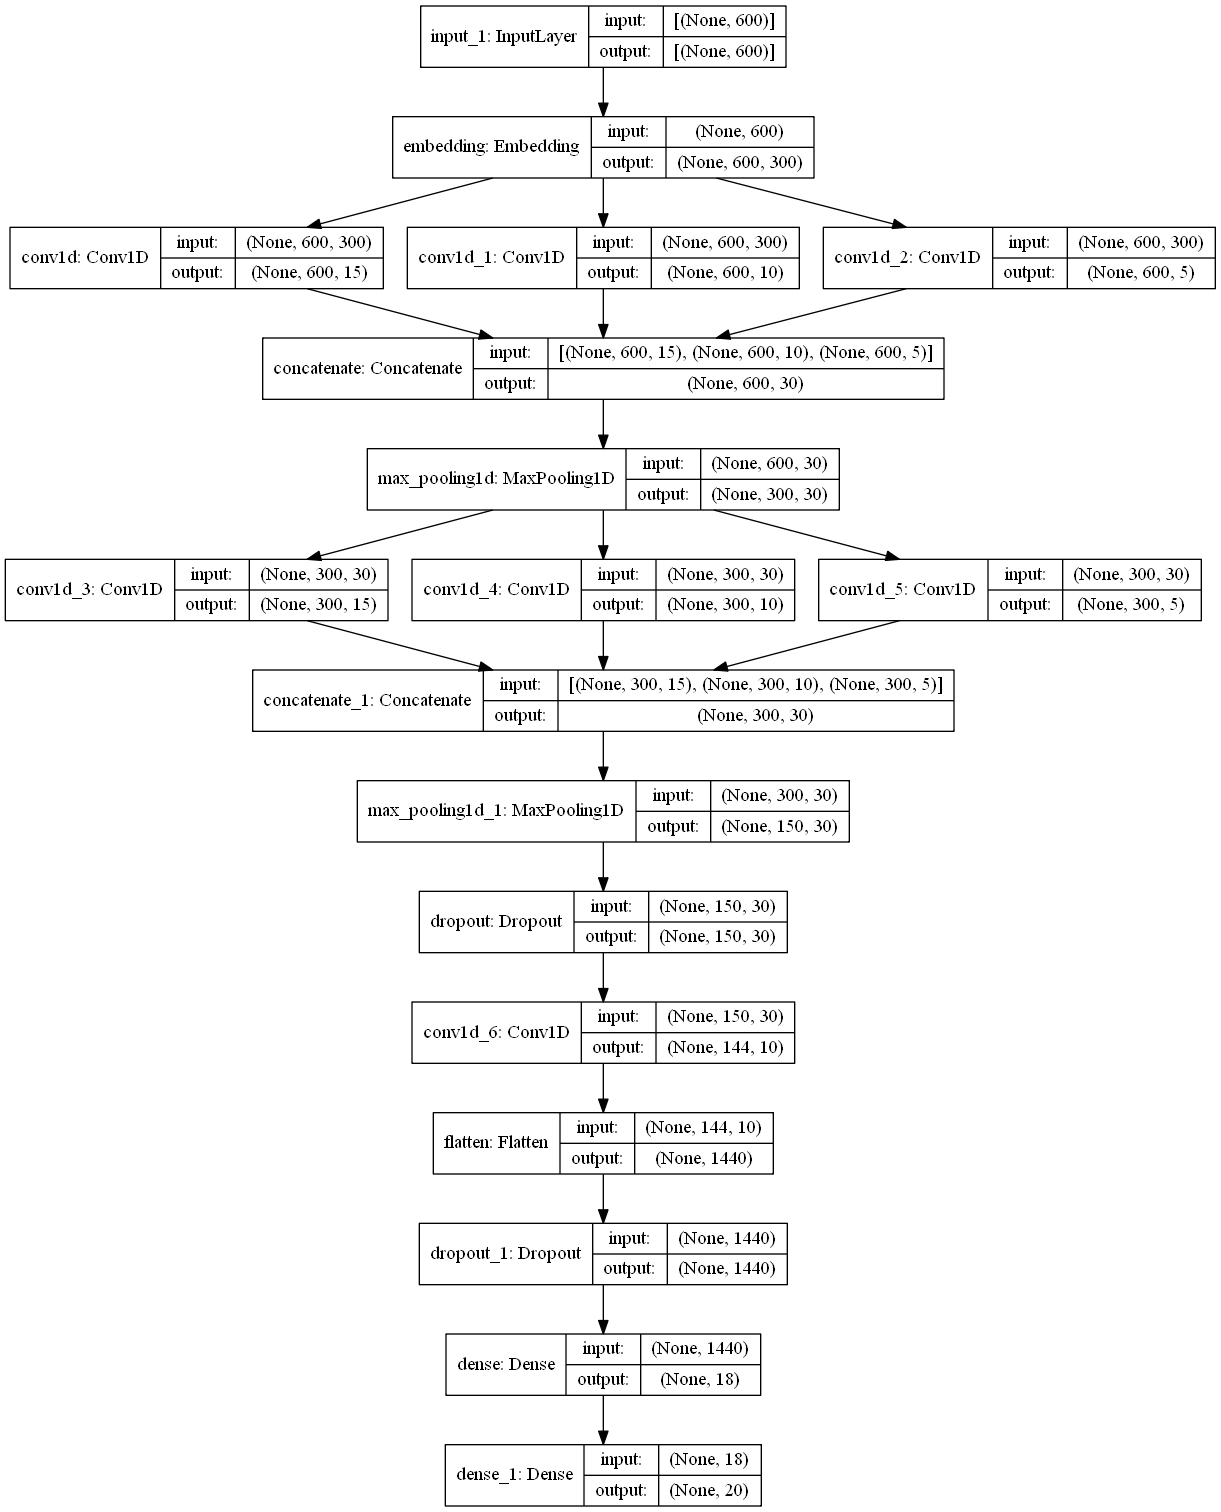

In [13]:
int_sequences_input = Input(shape=(600,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Conv1D(15, 3, activation="relu",padding = 'same')(embedded_sequences)
y = layers.Conv1D(10, 5, activation="relu",padding = 'same')(embedded_sequences)
z = layers.Conv1D(5, 7, activation="relu",padding = 'same')(embedded_sequences)
xyz = layers.concatenate([x, y,z],axis=2)
maxpool_1 = layers.MaxPooling1D()(xyz)
x = layers.Conv1D(15, 3, activation="relu",padding = 'same')(maxpool_1)
y = layers.Conv1D(10, 5, activation="relu",padding = 'same')(maxpool_1)
z = layers.Conv1D(5, 7, activation="relu",padding = 'same')(maxpool_1)
xyz = layers.concatenate([x, y,z],axis=2)
maxpool_2 = layers.MaxPooling1D()(xyz)
x = layers.Dropout(0.5)(maxpool_2)
x = layers.Conv1D(10, 7, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(18, activation="relu")(x)
preds = layers.Dense(20, activation="softmax")(x)
model = Model(int_sequences_input, preds)
model.summary()
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [58]:
import shutil
shutil.rmtree('logs_final')
shutil.rmtree('logs')
shutil.rmtree('Best_Model_L1')
shutil.rmtree('model_save')

In [14]:
#ModelCheckpoint = Saves the model when the acc. metric improve
filepath="Best_Model_L1/weights-{epoch:02d}-{val_acc:.4f}-{val_Micro_F1:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_acc',  verbose=1, save_best_only=True, mode='max')



#Stops when the acc. metric does not imporve for 2 iterations
earlystop = EarlyStopping(monitor='val_acc', patience=2, verbose=15,mode='max')

#Creates tensorboard logs 
log_dir="logs\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)

#terminates when the loss becomes NaN
TerminateWhenLossNaN = TerminateOnNaN()

model.compile(
    loss='categorical_crossentropy', optimizer="adam", metrics=["acc",Micro_F1]
)
model.fit(X_train_padded, Y_train_binarized, batch_size=128,epochs=100, validation_data=(X_test_padded, Y_test_binarized),callbacks=[checkpoint,earlystop,TerminateWhenLossNaN,tensorboard_callback])

Epoch 1/100
111/111 [==============================] - 106s 930ms/step - loss: 2.9341 - acc: 0.0661 - Micro_F1: nan - val_loss: 2.6673 - val_acc: 0.1081 - val_Micro_F1: nan

Epoch 00001: val_acc improved from -inf to 0.10814, saving model to Best_Model_L1\weights-01-0.1081-nan.hdf5
Epoch 2/100
111/111 [==============================] - 102s 917ms/step - loss: 2.2979 - acc: 0.2074 - Micro_F1: nan - val_loss: 1.8925 - val_acc: 0.3140 - val_Micro_F1: 0.1505

Epoch 00002: val_acc improved from 0.10814 to 0.31400, saving model to Best_Model_L1\weights-02-0.3140-0.1505.hdf5
Epoch 3/100
111/111 [==============================] - 102s 920ms/step - loss: 1.8266 - acc: 0.3296 - Micro_F1: 0.1901 - val_loss: 1.6263 - val_acc: 0.4323 - val_Micro_F1: 0.2654

Epoch 00003: val_acc improved from 0.31400 to 0.43233, saving model to Best_Model_L1\weights-03-0.4323-0.2654.hdf5
Epoch 4/100
111/111 [==============================] - 101s 912ms/step - loss: 1.5715 - acc: 0.4290 - Micro_F1: 0.3205 - val_loss:

In [15]:
%reload_ext tensorboard

In [16]:
%tensorboard --logdir logs/fit/

Reusing TensorBoard on port 6006 (pid 11024), started 1:25:35 ago. (Use '!kill 11024' to kill it.)

## Observations:
### 1.Since 95% of the values in the train data set have a length less than 509, then we can say that if the padding is of length 600 it will be sufficient to capture more than 95% of the information.
### 2.After the 10th epoch the loss hardly changes for cross-validation data but the train loss keeps reducing.
### 3.The growth of accuracy and micro-F1 score also reduces from the 15th epoch, the best accuracy observed is around 76% and F1 score of 0.77

### Model-2 : Using 1D convolutions with character embedding

<pre>
<pre><img src="https://i.ytimg.com/vi/CNY8VjJt-iQ/maxresdefault.jpg" width="70%">
Here are the some papers based on Char-CNN
 1. Xiang Zhang, Junbo Zhao, Yann LeCun. <a href="http://arxiv.org/abs/1509.01626">Character-level Convolutional Networks for Text Classification</a>.NIPS 2015
 2. Yoon Kim, Yacine Jernite, David Sontag, Alexander M. Rush. <a href="https://arxiv.org/abs/1508.06615">Character-Aware Neural Language Models</a>. AAAI 2016
 3. Shaojie Bai, J. Zico Kolter, Vladlen Koltun. <a href="https://arxiv.org/pdf/1803.01271.pdf">An Empirical Evaluation of Generic Convolutional and Recurrent Networks for Sequence Modeling</a>
 4. Use the pratrained char embeddings <a href='https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt'>https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt</a>
</pre>

<img src='https://i.imgur.com/EuuoJtr.png'>

In [103]:
t = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n', split='', char_level=True)
t.fit_on_texts(X_train['combined'])
X_train_encoded = t.texts_to_sequences(X_train['combined'])
X_test_encoded = t.texts_to_sequences(X_test['combined'])
print((X_train_encoded[0]))

[7, 15, 4, 17, 1, 7, 15, 4, 17, 1, 7, 15, 4, 17, 1, 8, 7, 15, 15, 8, 1, 16, 9, 7, 13, 2, 8, 1, 11, 5, 5, 23, 7, 6, 17, 1, 20, 5, 9, 1, 3, 10, 2, 1, 21, 2, 8, 3, 1, 8, 5, 14, 9, 13, 2, 1, 20, 5, 9, 1, 8, 7, 15, 15, 8, 1, 3, 10, 2, 1, 14, 8, 4, 1, 6, 5, 3, 1, 11, 5, 5, 23, 7, 6, 17, 1, 20, 5, 9, 1, 3, 10, 2, 1, 11, 5, 18, 2, 8, 3, 1, 16, 9, 7, 13, 2, 8, 1, 21, 14, 3, 1, 9, 4, 3, 10, 2, 9, 1, 20, 5, 9, 1, 3, 10, 2, 1, 21, 2, 8, 3, 1, 26, 14, 4, 11, 7, 3, 19, 1, 8, 7, 15, 15, 8, 1, 4, 6, 12, 1, 3, 10, 2, 1, 5, 6, 2, 1, 18, 7, 3, 10, 1, 3, 10, 2, 1, 11, 5, 18, 2, 8, 3, 1, 9, 4, 3, 2, 1, 12, 2, 20, 2, 13, 3, 7, 22, 2, 1, 8, 7, 15, 15, 8, 1, 23, 6, 5, 18, 1, 3, 10, 2, 1, 13, 10, 7, 16, 1, 15, 2, 9, 13, 10, 4, 6, 3, 1, 10, 4, 8, 1, 17, 5, 5, 12, 1, 16, 9, 7, 13, 2, 8, 1, 21, 14, 3, 1, 3, 10, 2, 19, 1, 8, 2, 2, 15, 8, 1, 10, 4, 22, 2, 1, 10, 7, 17, 10, 1, 9, 4, 3, 2, 1, 9, 2, 3, 14, 9, 6, 2, 12, 1, 8, 7, 15, 15, 8, 1, 12, 5, 2, 8, 1, 4, 6, 19, 5, 6, 2, 1, 23, 6, 5, 18, 1, 10, 5, 18, 1, 15, 4, 6

In [104]:
X_train_padded = pad_sequences(X_train_encoded, maxlen=3000, padding='post',truncating='post')
X_test_padded = pad_sequences(X_test_encoded, maxlen=3000, padding='post',truncating='post')

In [105]:
path_to_glove_file ='C:\\Users\\91985\\Downloads\\char-embeddings-master\\char-embeddings-master\\glove.840B.300d-char.txt'

embeddings_index = {}
with open(path_to_glove_file,encoding="utf8") as f:
    for line in f:
        char, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[char] = coefs

print("Found %s char vectors." % len(embeddings_index))

Found 94 char vectors.


In [106]:
num_tokens = len(t.word_index.keys()) + 1
embedding_dim = 300
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for char, i in t.word_index.items():
    embedding_vector = embeddings_index.get(char)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 38 words (2 misses)


In [107]:
embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=Constant(embedding_matrix),
    trainable=False,
    input_length=3000
)

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 3000)]            0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 3000, 300)         12300     
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 3000, 16)          33616     
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 3000, 16)          1296      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 1500, 16)          0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 1500, 10)          810       
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 1500, 10)          310 

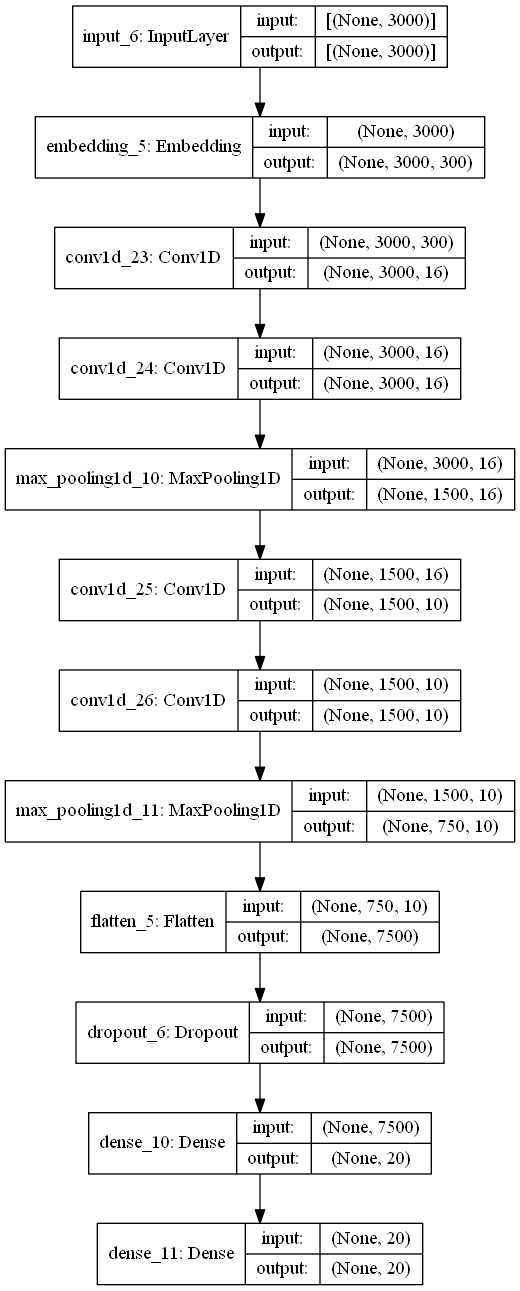

In [108]:
int_sequences_input = Input(shape=(3000,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Conv1D(16, 7, activation="relu",padding = 'same')(embedded_sequences)
x = layers.Conv1D(16, 5, activation="relu",padding = 'same')(x)
maxpool_1 = layers.MaxPooling1D()(x)
x = layers.Conv1D(10, 5, activation="relu",padding = 'same')(maxpool_1)
x = layers.Conv1D(10, 3, activation="relu",padding = 'same')(x)
maxpool_2 = layers.MaxPooling1D()(x)
x = layers.Flatten()(maxpool_2)
x = layers.Dropout(0.75)(x)
x = layers.Dense(20, activation="relu")(x)
preds = layers.Dense(20, activation="softmax")(x)
model = Model(int_sequences_input, preds)
model.summary()
dot_img_file = '/tmp/model_2.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [109]:
import shutil
shutil.rmtree('logs_L2')

In [110]:
import tensorflow_addons as tfa

In [111]:
#ModelCheckpoint = Saves the model when the acc. metric improve
filepath="Best_Model_L2/weights-{epoch:02d}-{val_acc:.4f}-{val_micro_F1:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_acc',  verbose=1, save_best_only=True, mode='max')

# F1 metric from tensor flow
metric_F1 = tfa.metrics.F1Score(num_classes = 20, average = 'micro' ,name = 'micro_F1',threshold = 0.5)

#Stops when the acc. metric does not imporve for 2 iterations
earlystop = EarlyStopping(monitor='val_acc', patience=3, verbose=15,mode='max')

#Creates tensorboard logs 
log_dir="logs_L2\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)

#terminates when the loss becomes NaN
TerminateWhenLossNaN = TerminateOnNaN()

model.compile(
    loss='categorical_crossentropy', optimizer="adam", metrics=["acc",metric_F1]
)
model.fit(X_train_padded, Y_train_binarized, batch_size=128,epochs=50, validation_data=(X_test_padded, Y_test_binarized),callbacks=[checkpoint,earlystop,TerminateWhenLossNaN,tensorboard_callback])

Epoch 1/50
111/111 [==============================] - 329s 3s/step - loss: 2.9624 - acc: 0.0739 - micro_F1: 0.0000e+00 - val_loss: 2.9338 - val_acc: 0.0901 - val_micro_F1: 0.0000e+00

Epoch 00001: val_acc improved from -inf to 0.09008, saving model to Best_Model_L2\weights-01-0.0901-0.0000.hdf5
Epoch 2/50
111/111 [==============================] - 323s 3s/step - loss: 2.9309 - acc: 0.0865 - micro_F1: 0.0000e+00 - val_loss: 2.9118 - val_acc: 0.0967 - val_micro_F1: 0.0000e+00

Epoch 00002: val_acc improved from 0.09008 to 0.09666, saving model to Best_Model_L2\weights-02-0.0967-0.0000.hdf5
Epoch 3/50
111/111 [==============================] - 321s 3s/step - loss: 2.9122 - acc: 0.0908 - micro_F1: 0.0000e+00 - val_loss: 2.8944 - val_acc: 0.1013 - val_micro_F1: 0.0000e+00

Epoch 00003: val_acc improved from 0.09666 to 0.10134, saving model to Best_Model_L2\weights-03-0.1013-0.0000.hdf5
Epoch 4/50
111/111 [==============================] - 323s 3s/step - loss: 2.8924 - acc: 0.0984 - micro_F1

In [112]:
%reload_ext tensorboard

In [113]:
%tensorboard --logdir logs_L2/fit/ --port=8008

Reusing TensorBoard on port 8008 (pid 22044), started 1 day, 3:15:41 ago. (Use '!kill 22044' to kill it.)

## Observations:
### 1.Since in the word embedding we selected 600 words to be max. In a sentence, the assuming that each word consists of 5 letters, I took the sequence length to be 3000.
### 2.After the 8th epoch we see that our model start to overfits as the train accuracy shoots up but cross validation doesn’t, the F1 score also take a dip in the 9th epoch, also the difference between train and cross validation loss starts to increase rapidly. So the model that is saved at 8th epoch is the best model that we get.
### 3.The best accuracy observed is around 12% and F1 score of 0.0013 at the 8th epoch(out best model)
### 4.Since my train and cv accuracy are not that far away and they both show an improving trend till the 8h epoch we can say that our model is not overfitting up until the 8th epoch.